In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
import math
from adjustText import adjust_text

### 1st version

In [2]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap/remove_index0/'
susie = pd.read_csv(path+ 'susie_snp.tsv', sep = '\t')
mutual = pd.read_csv(path + 'mutual_snp.tsv', sep = '\t')
functional = pd.read_csv(path + 'functional_snp.tsv', sep = '\t')

In [15]:
functional.shape

(476, 15)

In [5]:
susie['source']  = 'susie specific'
mutual['source'] = 'mutual'
functional['source'] = 'functional'
all_snp = susie.append(mutual)
all_functional = all_snp.append(functional)

In [4]:
all_snp

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
0,rs12037841,1,207510847,T,G,0.1888,283145,-11.86540,1.790780e-32,0.201620,-0.005907,0.011854,chr1:206000001-209000001:3,207510847,susie specific
1,rs1752684,1,207573951,A,G,0.1923,283145,-11.60190,4.028330e-31,0.024769,-0.000718,0.004553,chr1:206000001-209000001:3,207573951,susie specific
2,rs10863417,1,207623552,A,T,0.1898,283145,-11.64080,2.556770e-31,0.022745,-0.000651,0.004281,chr1:206000001-209000001:3,207623552,susie specific
3,rs10863418,1,207624893,C,G,0.1965,283145,-11.65690,2.117000e-31,0.014597,-0.000411,0.003387,chr1:206000001-209000001:3,207624893,susie specific
4,rs4844610,1,207629207,A,C,0.1859,283145,-11.90380,1.130160e-32,0.382038,-0.011268,0.014432,chr1:206000001-209000001:3,207629207,susie specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,rs12482978,21,25875743,G,A,0.4745,283145,-4.61728,3.887950e-06,0.020812,-0.000200,0.001405,chr21:24000001-27000001:1,2130165966,mutual
1072,rs8127927,21,25878486,A,C,0.4747,283145,-4.52439,6.056990e-06,0.014228,-0.000135,0.001146,chr21:24000001-27000001:1,2130168709,mutual
1073,rs1876062,21,25884151,C,T,0.4764,283145,-4.47561,7.619350e-06,0.013432,-0.000127,0.001111,chr21:24000001-27000001:1,2130174374,mutual
1074,rs2829969,21,25885054,C,T,0.4763,283145,-4.50000,6.795350e-06,0.015743,-0.000150,0.001210,chr21:24000001-27000001:1,2130175277,mutual


Text(0.5, 1.0, 'susie specific SNPs')

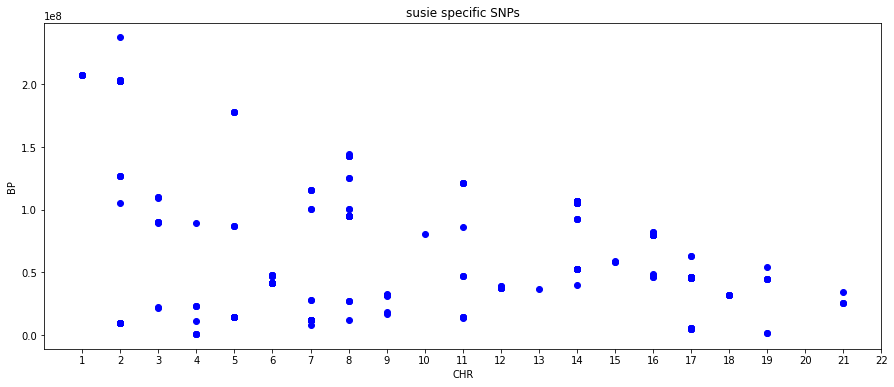

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(susie.CHR, susie.BP, color = 'blue')
plt.xlabel('CHR')
plt.xticks(range(1,23))
plt.ylabel('BP')
plt.title('susie specific SNPs')

Text(0.5, 1.0, 'mutual SNPs')

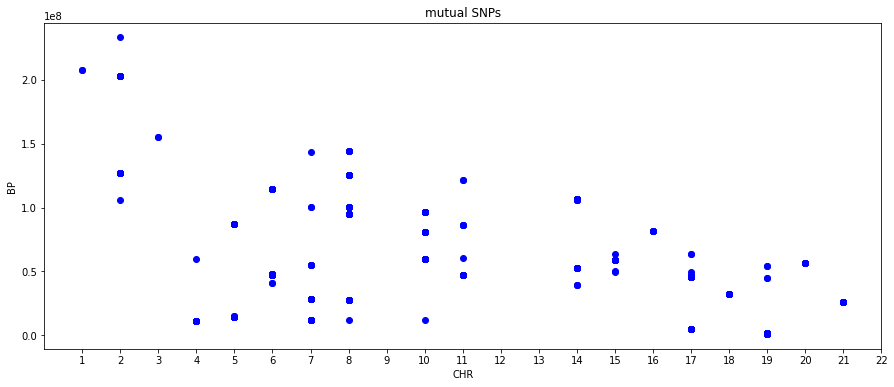

In [16]:
plt.figure(figsize=(15,6))
plt.scatter(mutual.CHR, mutual.BP, color = 'blue')
plt.xlabel('CHR')
plt.xticks(range(1,23))
plt.ylabel('BP')
plt.title('mutual SNPs')

In [9]:
all_snp[all_snp.SNP=='rs148764066']

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
182,rs148764066,8,142943835,G,A,0.0006,252054,2.88875,0.003868,1.0,7.707427,0.041131,chr8:141000001-144000001:4,1318011422,susie specific


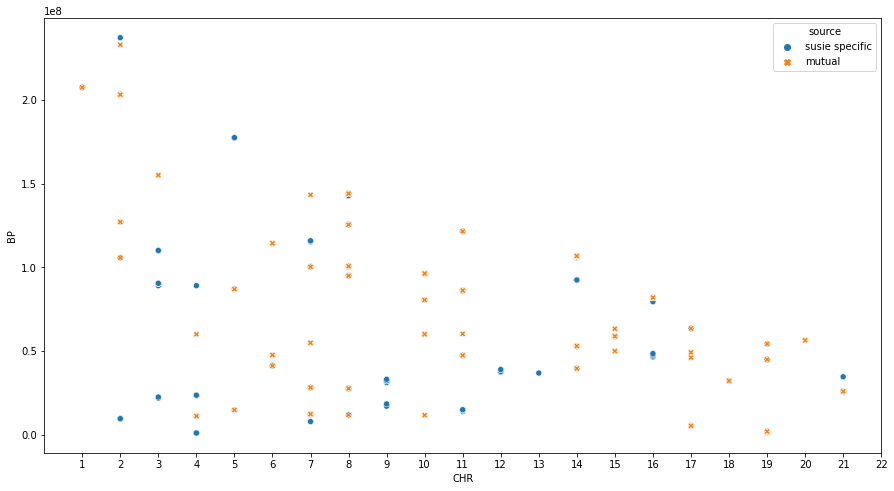

In [46]:
plt.figure(figsize=(15,8))
# plt.scatter(all_snp.CHR, all_snp.BP, c = all_snp.source)
# plt.xlabel('CHR')
# plt.xticks(range(1,23))
# plt.ylabel('BP')
# plt.title('susie specific SNPs')

plot = sns.scatterplot(data=all_snp, x= 'CHR', y = 'BP', hue='source', style = 'source')
plot.set_xticks(range(1,23))

plt.savefig('/gpfs/commons/home/tlin/pic/polyfun_susie_vs_mutual.pdf')

In [58]:
susie[susie.CHR == 12]

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
209,rs1164723179,12,37271528,G,A,0.0024,83972,2.940650,0.003275,0.890017,0.386084,0.137106,chr12:36000001-39000001:5,1607441528,susie specific
210,rs1203668302,12,37313969,C,T,0.0005,42083,2.194490,0.028200,0.080479,0.075999,0.257208,chr12:36000001-39000001:5,1607483969,susie specific
211,rs1284335013,12,37324536,G,A,0.0014,55361,-4.405260,0.000011,1.000000,-1.015215,0.026970,chr12:36000001-39000001:1,1607494536,susie specific
212,rs797031141,12,37419293,G,A,0.0007,42083,2.499580,0.012434,0.999997,1.088998,0.038173,chr12:36000001-39000001:2,1607589293,susie specific
213,rs1162070400,12,37449448,C,T,0.0007,42083,-2.439430,0.014710,1.000000,-2.250775,0.038128,chr12:36000001-39000001:3,1607619448,susie specific
214,rs980911191,12,37778067,C,T,0.0003,42083,1.592350,0.111305,0.100496,0.273791,0.819326,chr12:36000001-39000001:4,1607948067,susie specific
215,rs566116159,12,38853073,A,C,0.0027,279337,0.066002,0.947376,0.391374,-0.067445,0.084982,chr12:37000001-40000001:5,1609023073,susie specific
216,rs571147735,12,38940918,A,G,0.0028,279337,0.113184,0.909885,0.576376,-0.098022,0.085277,chr12:37000001-40000001:5,1609110918,susie specific


In [60]:
median = susie[susie.CHR == 12].BP.median()
print(median)
susie[susie.CHR == 12].BP - median

37434370.5


209    -162842.5
210    -120401.5
211    -109834.5
212     -15077.5
213      15077.5
214     343696.5
215    1418702.5
216    1506547.5
Name: BP, dtype: float64

In [63]:

mean = susie[susie.CHR == 12].BP.mean()
print(mean)
susie[susie.CHR == 12].BP - mean

37793854.0


209    -522326.0
210    -479885.0
211    -469318.0
212    -374561.0
213    -344406.0
214     -15787.0
215    1059219.0
216    1147064.0
Name: BP, dtype: float64

In [73]:
## seperate them into two groups
subset1 =  susie[(susie.CHR == 12) & (susie.BP < 38000000)]
median = subset1.BP.median()
print(median)
subset1.BP - median


37371914.5


In [72]:
mean = subset1.BP.mean()
subset1.BP - mean

209   -154612.166667
210   -112171.166667
211   -101604.166667
212     -6847.166667
213     23307.833333
214    351926.833333
Name: BP, dtype: float64

In [36]:
check = all_snp[all_snp.PIP > 0.75]
check['-logP'] = -np.log10(check['P'])

In [18]:
check

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source,logP,-logP
18,rs12478689,2,105736833,C,T,0.0017,251632,1.43467,1.513810e-01,1.000000,-0.446123,0.023980,chr2:104000001-107000001:2,313370218,susie specific,0.819929,0.819929
19,rs186583192,2,127132858,G,A,0.0018,252054,-2.39158,1.677610e-02,0.953883,-0.120311,0.035181,chr2:126000001-129000001:2,334766243,susie specific,1.775309,1.775309
70,rs185889117,2,237327083,A,T,0.0033,273836,5.24722,1.544120e-07,0.953845,0.088642,0.025974,chr2:236000001-239000001:1,444960468,susie specific,6.811319,6.811319
71,rs759895372,3,21851278,G,T,0.0005,233257,-3.32930,8.706550e-04,0.994423,-0.350133,0.052045,chr3:20000001-23000001:2,466811746,susie specific,3.060154,3.060154
72,rs185926389,3,22497284,C,T,0.0015,247869,4.56333,5.034900e-06,0.997891,0.178993,0.027276,chr3:21000001-24000001:1,467457752,susie specific,5.298009,5.298009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,rs12151021,19,1050875,A,G,0.3357,282331,-11.34410,7.935100e-30,1.000000,-0.030400,0.002129,chr19:1-3000001:1,1994650013,mutual,29.100448,29.100448
1029,rs200538373,19,1061893,G,C,0.0039,279337,6.34981,2.155750e-10,0.999984,0.120084,0.016134,chr19:1-3000001:2,1994661031,mutual,9.666402,9.666402
1031,rs4147933,19,1064566,A,G,0.0408,282331,-4.26432,2.005140e-05,0.960761,-0.027267,0.007428,chr19:1-3000001:3,1994663704,mutual,4.697855,4.697855
1045,rs79701229,19,44881674,G,A,0.0140,281838,19.07320,4.219290e-81,1.000000,0.180604,0.008590,chr19:43000001-46000001:4,2038480812,mutual,80.374761,80.374761


Text(0.5, 1.0, 'check SNP with PIP > 0.75')

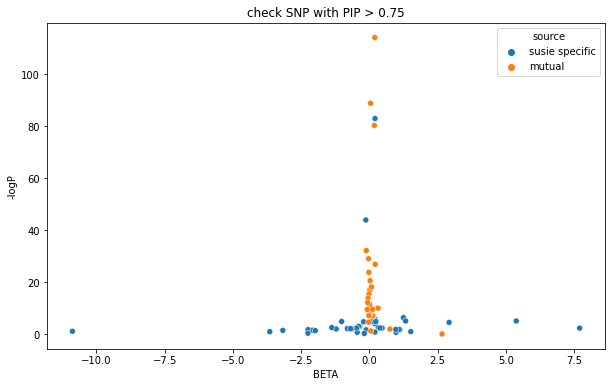

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=check, x=check.BETA_MEAN, y='-logP', hue='source', palette='tab10')

# Set plot labels and title
plt.xlabel('BETA')
plt.ylabel('-logP')
plt.title('check SNP with PIP > 0.75')


Text(0.5, 1.0, 'check SNP with PIP > 0.75')

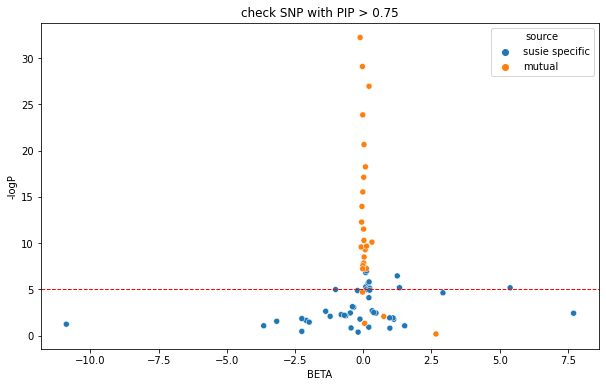

In [27]:
plt.figure(figsize=(10, 6))
check = check[check['-logP'] <40]
sns.scatterplot(data=check, x=check.BETA_MEAN, y='-logP', hue='source', palette='tab10')

# Set plot labels and title
plt.xlabel('BETA')
plt.ylabel('-logP')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1)
plt.title('check SNP with PIP > 0.75')

In [42]:
check.source.value_counts()

susie specific    47
mutual            28
Name: source, dtype: int64

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


susie specific    47
mutual            28
functional         5
Name: source, dtype: int64


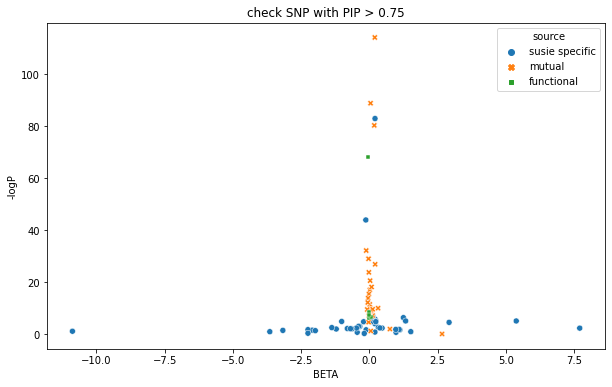

In [12]:
## add functional
check = all_functional[all_functional.PIP > 0.75]
check['-logP'] = -np.log10(check['P'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=check, x=check.BETA_MEAN, y='-logP', hue='source', style='source',palette='tab10')

# Set plot labels and title
plt.xlabel('BETA')
plt.ylabel('-logP')
plt.title('check SNP with PIP > 0.75')
print(check.source.value_counts())

mutual            24
susie specific    13
functional         5
Name: source, dtype: int64


Text(0.5, 1.0, 'check SNP with PIP > 0.75')

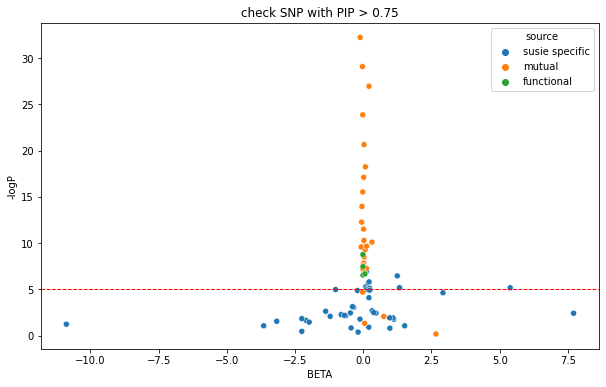

In [13]:
print(check[check['-logP'] >= 5].source.value_counts())

plt.figure(figsize=(10, 6))
check = check[check['-logP'] <40]
sns.scatterplot(data=check, x=check.BETA_MEAN, y='-logP', hue='source', palette='tab10')

# Set plot labels and title
plt.xlabel('BETA')
plt.ylabel('-logP')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1)
plt.title('check SNP with PIP > 0.75')



In [14]:
print(24/28)
print(13/47)

0.8571428571428571
0.2765957446808511


In [45]:
all_snp.source.value_counts()

mutual            1076
susie specific     652
Name: source, dtype: int64

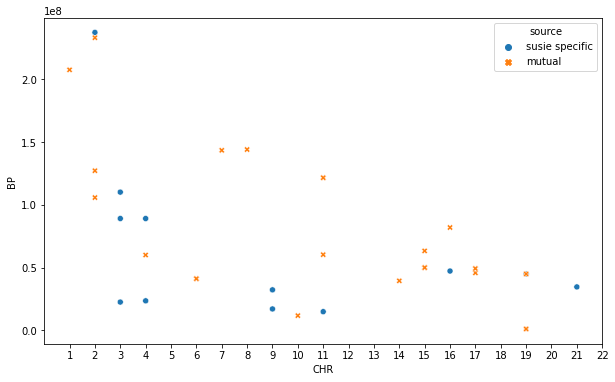

In [52]:
plt.figure(figsize=(10,6))
plot = sns.scatterplot(data=check[check['-logP'] >= 5], x= 'CHR', y = 'BP', hue='source', style = 'source')
plot.set_xticks(range(1,23))
#plt.savefig('/gpfs/commons/home/tlin/pic/polyfun_susie_vs_mutual_focused.pdf')

In [53]:
check[check['-logP'] >= 5]

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source,-logP
70,rs185889117,2,237327083,A,T,0.0033,273836,5.24722,1.544120e-07,0.953845,0.088642,0.025974,chr2:236000001-239000001:1,444960468,susie specific,6.811319
72,rs185926389,3,22497284,C,T,0.0015,247869,4.56333,5.034900e-06,0.997891,0.178993,0.027276,chr3:21000001-24000001:1,467457752,susie specific,5.298009
73,rs537370372,3,89069280,A,G,0.0075,277461,4.42369,9.702710e-06,0.999427,0.142878,0.012141,chr3:88000001-91000001:1,534029748,susie specific,5.013107
80,rs138873088,3,110105951,G,T,0.0045,279337,4.54970,5.372280e-06,0.985827,0.092217,0.018576,chr3:109000001-112000001:1,555066419,susie specific,5.269841
87,rs566928759,4,23481532,G,A,0.0016,268506,4.73887,2.149080e-06,0.997099,0.179592,0.026980,chr4:22000001-25000001:1,623577932,susie specific,5.667747
89,rs76554426,4,89055173,C,A,0.0011,252054,4.80282,1.564430e-06,0.991519,0.213241,0.036140,chr4:88000001-91000001:1,689151573,susie specific,5.805644
186,rs145906938,9,17009612,G,A,0.0014,252054,4.46880,7.866020e-06,1.000000,0.239417,0.026961,chr9:16000001-19000001:1,1336176518,susie specific,5.104245
192,rs7030974,9,32230624,C,A,0.0013,252054,5.09167,3.549210e-07,0.883882,1.246366,0.452505,chr9:31000001-34000001:5,1351397530,susie specific,6.449868
198,rs567759779,11,14847009,C,G,0.0004,233257,4.49940,6.814580e-06,1.000000,5.381558,0.070556,chr11:13000001-16000001:1,1463452131,susie specific,5.166561
260,rs779935382,16,47221798,C,T,0.0024,247869,4.50221,6.724970e-06,1.000000,1.327716,0.028973,chr16:46000001-49000001:3,1863248601,susie specific,5.172310


In [18]:
## add functional
all_functional = all_snp.append(functional)
check_functional = all_functional[all_functional.PIP >= 0.75]
check_functional['-logP'] = -np.log10(check_functional ['P'])
check_functional = check_functional [check_functional ['-logP'] >= 5]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
check_functional 

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source,SNPVAR,-logP
18,rs12478689,2,105736833,C,T,0.0017,251632,1.43467,1.513810e-01,1.000000,-0.446123,0.023980,chr2:104000001-107000001:2,313370218.0,susie specific,NaN,0.819929
19,rs186583192,2,127132858,G,A,0.0018,252054,-2.39158,1.677610e-02,0.953883,-0.120311,0.035181,chr2:126000001-129000001:2,334766243.0,susie specific,NaN,1.775309
70,rs185889117,2,237327083,A,T,0.0033,273836,5.24722,1.544120e-07,0.953845,0.088642,0.025974,chr2:236000001-239000001:1,444960468.0,susie specific,NaN,6.811319
71,rs759895372,3,21851278,G,T,0.0005,233257,-3.32930,8.706550e-04,0.994423,-0.350133,0.052045,chr3:20000001-23000001:2,466811746.0,susie specific,NaN,3.060154
72,rs185926389,3,22497284,C,T,0.0015,247869,4.56333,5.034900e-06,0.997891,0.178993,0.027276,chr3:21000001-24000001:1,467457752.0,susie specific,NaN,5.298009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,rs4083631,1,207537608,G,A,0.4278,86460,-6.01890,1.756060e-09,0.992005,-0.011882,0.002274,chr1:206000001-209000001:1,NaN,functional,2.133000e-09,8.755461
171,rs2245466,4,40197226,G,C,0.3431,283145,-5.13190,2.868320e-07,0.970110,-0.010457,0.002761,chr4:39000001-42000001:1,NaN,functional,5.095700e-08,6.542372
311,rs147042536,14,92676516,T,C,0.0071,281838,5.18700,2.137090e-07,0.957903,0.059393,0.017009,chr14:91000001-94000001:2,NaN,functional,1.952400e-08,6.670177
466,rs2526377,17,58332680,A,G,0.4449,283145,-5.51220,3.543760e-08,0.825789,-0.008917,0.004488,chr17:57000001-60000001:1,NaN,functional,1.520900e-07,7.450536


In [26]:
check_functional.CHR

70       2
72       3
73       3
80       3
87       4
89       4
186      9
192      9
198     11
260     16
642     19
646     19
651     21
1        1
2        2
3        2
178      2
192      4
217      6
218      6
359      7
438      8
441     10
495     11
500     11
501     11
503     14
643     15
644     15
661     15
664     16
677     17
1009    17
1025    19
1029    19
1045    19
1046    19
0        1
171      4
311     14
466     17
468     19
Name: CHR, dtype: int64

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22')]

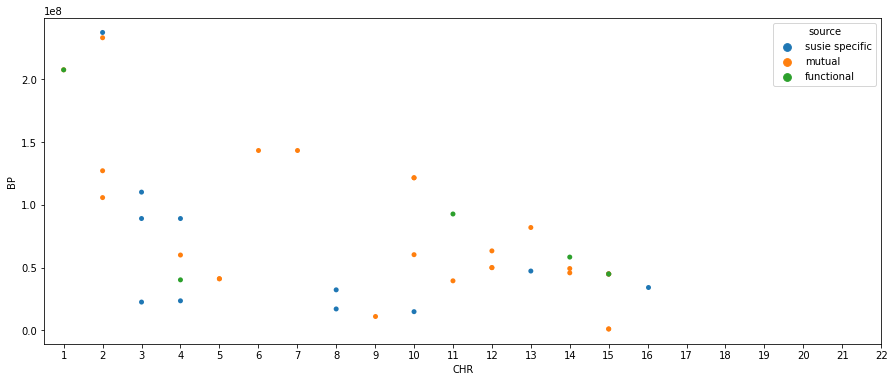

In [27]:
plt.figure(figsize=(15,6))
#plot = sns.scatterplot(data=check_functional [check_functional ['-logP'] >= 5], x= 'CHR', y = 'BP', hue='source', style = 'source')
plot=sns.stripplot(data=check_functional, x='CHR', y='BP', hue='source', jitter=False, dodge=False)
plot.set_xticks(range(0,22))
plot.set_xticklabels(range(1,23,1))
#plt.savefig('/gpfs/commons/home/tlin/pic/polyfun_susie_vs_mutual_focused.pdf')

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22')]

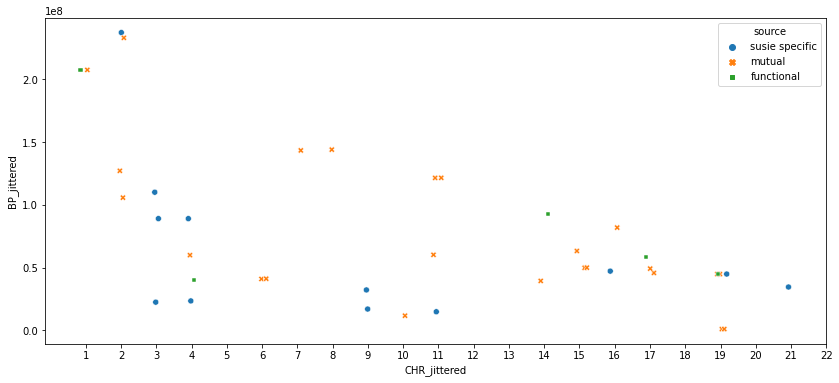

In [32]:

filtered_data = check_functional 
jitter_strength = 0.1
filtered_data['CHR_jittered'] = filtered_data['CHR'] + np.random.normal(0, jitter_strength, size=len(filtered_data))
filtered_data['BP_jittered'] = filtered_data['BP'] + np.random.normal(0, jitter_strength, size=len(filtered_data))

# Create the plot
plt.figure(figsize=(14, 6))
plot = sns.scatterplot(data=filtered_data, x='CHR', y='BP', hue='source', style='source')
plot.set_xticks(range(1,23))
plot.set_xticklabels(range(1,23))

### OCT VER

In [3]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/PRS/36k_hg38/snp_pip_thres/remove_index0/'
susie = pd.read_csv(path+ 'susie_snp.tsv', sep = '\t')
mutual = pd.read_csv(path + 'mutual_snp.tsv', sep = '\t')
functional = pd.read_csv(path + 'only_functional_snp_bl.tsv', sep = '\t')
bl_omics = pd.read_csv(path + 'functional_bl_omics_bl.tsv', sep = '\t')

In [4]:
susie['source']  = 'susie specific'
mutual['source'] = 'mutual'
functional['source'] = 'functional'
bl_omics['source'] = 'bl_omics'
all_snp = susie.append(mutual).append(functional)
#all_functional = all_snp.append(functional)

mutual            684
susie specific    392
functional        253
Name: source, dtype: int64


Text(0.5, 1.0, 'all SNP')

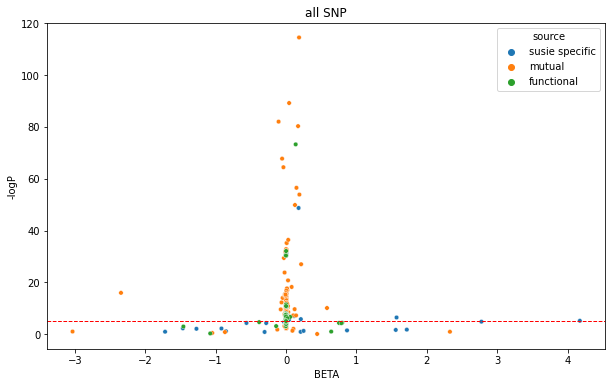

In [24]:
all_snp['-logP'] = -np.log10(all_snp['P'])
print(all_snp[all_snp['-logP'] >= 5].source.value_counts())

plt.figure(figsize=(10, 6))
# all_snp = all_snp[all_snp['-logP'] <40]
sns.scatterplot(data=all_snp, x=all_snp.BETA_MEAN, y='-logP', hue='source', palette='tab10', s=20)

# Set plot labels and title
plt.xlabel('BETA')
plt.ylabel('-logP')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1)
plt.title('all SNP')



Text(0.5, 1.0, 'PIP > 0.75')

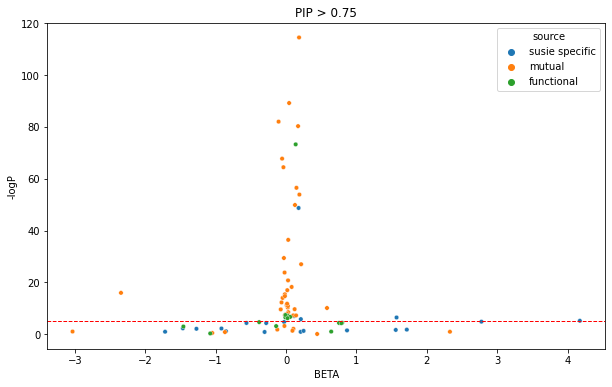

In [25]:
plt.figure(figsize=(10, 6))
plot_snp = all_snp[all_snp['PIP'] > 0.75]
sns.scatterplot(data=plot_snp, x=plot_snp.BETA_MEAN, y='-logP', hue='source', palette='tab10', s=20)

# Set plot labels and title
plt.xlabel('BETA')
plt.ylabel('-logP')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1)
plt.title('PIP > 0.75')

In [17]:
all_snp[all_snp['PIP'] < 0.5]

,CHR,BP,SNP,A2,A1,BETA,SE,P,N,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,cumulative_pos,source,SNPVAR,-logP
0,1,207624893,rs10863418,G,C,-0.1189,0.0102,3.314000e-31,487511,0.888099,-11.65690,0.012211,-0.000353,0.003231,chr1:206000001-209000001:1,0.8035,207624893,susie specific,NaN,30.479647
1,2,9427315,rs72775266,C,T,-0.0478,0.0101,2.214000e-06,487511,0.953289,-4.73267,0.005993,-0.000065,0.000871,chr2:8000001-11000001:1,0.2020,217056622,susie specific,NaN,5.654822
2,2,9435664,rs11680995,A,G,-0.0477,0.0101,2.325000e-06,487511,0.953000,-4.72277,0.005823,-0.000062,0.000857,chr2:8000001-11000001:1,0.2021,217064971,susie specific,NaN,5.633577
3,2,9442713,rs11683637,A,G,-0.0476,0.0101,2.390000e-06,487511,0.954000,-4.71287,0.005515,-0.000059,0.000831,chr2:8000001-11000001:1,0.2020,217072020,susie specific,NaN,5.621602
4,2,9442915,rs11674109,T,C,-0.0478,0.0101,2.221000e-06,487511,0.953000,-4.73267,0.006016,-0.000065,0.000873,chr2:8000001-11000001:1,0.2021,217072222,susie specific,NaN,5.653451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19,1038077,rs2070217,G,T,-0.0995,0.0236,2.579000e-05,486567,0.904980,-4.21610,0.050176,-0.002145,0.009407,chr19:1-3000001:10,0.0370,2127411340,functional,4.076700e-08,4.588549
542,19,54282691,rs436911,C,G,0.0584,0.0111,1.365000e-07,486567,1.060000,5.26130,0.031124,0.000390,0.002244,chr19:53000001-56000001:1,0.2152,2180655954,functional,3.207100e-08,6.864867
544,21,25881883,rs2829966,T,C,-0.0351,0.0081,1.563000e-05,487511,0.966000,-4.33330,0.012251,-0.000102,0.000969,chr21:24000001-27000001:1,0.5225,2262961525,functional,9.249500e-09,4.806041
545,21,25887070,rs1787435,C,G,0.0383,0.0084,5.538000e-06,487511,1.039000,4.55950,0.049871,0.000427,0.001976,chr21:24000001-27000001:1,0.3962,2262966712,functional,3.496000e-08,5.256647


In [6]:
all_snp

,CHR,BP,SNP,A2,A1,BETA,SE,P,N,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,cumulative_pos,source,SNPVAR
0,1,207624893,rs10863418,G,C,-0.1189,0.0102,3.314000e-31,487511,0.888099,-11.65690,0.012211,-0.000353,0.003231,chr1:206000001-209000001:1,0.8035,207624893,susie specific,NaN
1,2,9427315,rs72775266,C,T,-0.0478,0.0101,2.214000e-06,487511,0.953289,-4.73267,0.005993,-0.000065,0.000871,chr2:8000001-11000001:1,0.2020,217056622,susie specific,NaN
2,2,9435664,rs11680995,A,G,-0.0477,0.0101,2.325000e-06,487511,0.953000,-4.72277,0.005823,-0.000062,0.000857,chr2:8000001-11000001:1,0.2021,217064971,susie specific,NaN
3,2,9442713,rs11683637,A,G,-0.0476,0.0101,2.390000e-06,487511,0.954000,-4.71287,0.005515,-0.000059,0.000831,chr2:8000001-11000001:1,0.2020,217072020,susie specific,NaN
4,2,9442915,rs11674109,T,C,-0.0478,0.0101,2.221000e-06,487511,0.953000,-4.73267,0.006016,-0.000065,0.000873,chr2:8000001-11000001:1,0.2021,217072222,susie specific,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,19,54282691,rs436911,C,G,0.0584,0.0111,1.365000e-07,486567,1.060000,5.26130,0.031124,0.000390,0.002244,chr19:53000001-56000001:1,0.2152,2180655954,functional,3.207100e-08
543,20,408274,rs144693124,C,G,0.0892,0.0180,6.720000e-07,487511,1.093000,4.95560,0.960058,0.020930,0.005947,chr20:1-3000001:1,0.0589,2181064328,functional,3.630100e-08
544,21,25881883,rs2829966,T,C,-0.0351,0.0081,1.563000e-05,487511,0.966000,-4.33330,0.012251,-0.000102,0.000969,chr21:24000001-27000001:1,0.5225,2262961525,functional,9.249500e-09
545,21,25887070,rs1787435,C,G,0.0383,0.0084,5.538000e-06,487511,1.039000,4.55950,0.049871,0.000427,0.001976,chr21:24000001-27000001:1,0.3962,2262966712,functional,3.496000e-08


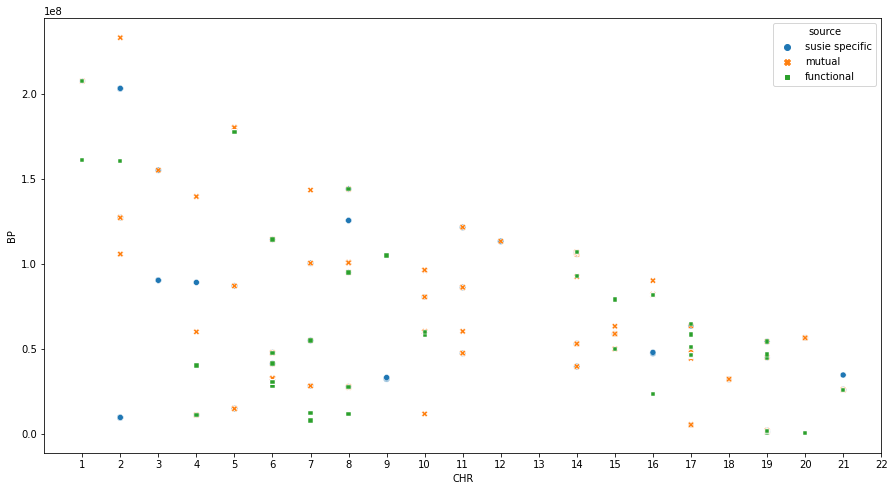

In [7]:
plt.figure(figsize=(15,8))
# plt.scatter(all_snp.CHR, all_snp.BP, c = all_snp.source)
# plt.xlabel('CHR')
# plt.xticks(range(1,23))
# plt.ylabel('BP')
# plt.title('susie specific SNPs')

plot = sns.scatterplot(data=all_snp, x= 'CHR', y = 'BP', hue='source', style = 'source')
plot.set_xticks(range(1,23))